In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import zipfile
import urllib
import urllib.request
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.style.use('ggplot')
%matplotlib inline

link = r"http://transparencia.tce.sp.gov.br/sites/municipal/files/csv/despesas-limeira-2017.zip"

OriginalFileName = r"C:\Python27\despesas-limeira-2017.zip.csv"
NewFileName = r"formatado.csv"

In [2]:
urllib.request.urlretrieve(r"http://transparencia.tce.sp.gov.br/sites/municipal/files/csv/despesas-limeira-2017.zip", r"C:\Users\andre\Desktop\ComprasLicitacoes.zip")
zip_ref = zipfile.ZipFile(r"C:\Users\andre\Desktop\ComprasLicitacoes.zip", 'r')
zip_ref.extractall(r"C:\Python27")
zip_ref.close()

In [3]:
def remover_acentos(txt):
    return normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII')

In [4]:
with open(OriginalFileName, 'r') as file :
  filedata = file.read()

filedata = filedata.replace(',', '.')
filedata = remover_acentos(filedata)

with open(NewFileName, 'w') as file:
  file.write(filedata)

In [5]:
data = pd.read_csv(NewFileName, sep=';')
pd.to_numeric(data.vl_despesa, errors='coerce')
df = pd.DataFrame(data)

In [6]:
uniques = df.ds_acao.unique()

In [7]:
data.head()

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,...,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,355697086,2017,Limeira,PREFEITURA MUNICIPAL DE LIMEIRA,2,fevereiro,Empenhado,2405-2017,CNPJ - PESSOA JURIDICA - 21459306000180,J.C. GASPARINI INSTALACOES - ME,...,TRANSPORTES COLETIVOS URBANOS,206,CIDADE SEGURA E CUIDADA,2190,GERENCIAMENTO DE TRANSITO,TESOURO - EXERCICIOS ANTERIORES,0100 - GERAL TOTAL,PREGAO,33903908 - MANUTENCAO DE SOFTWARE,SOFTWARE E HARDWARE SISTEMA ARRECADACAO PEDAGIO
1,356239797,2017,Limeira,PREFEITURA MUNICIPAL DE LIMEIRA,2,fevereiro,Valor Pago,2406-2017,CNPJ - PESSOA JURIDICA - 43035146001076,PROTEGE S A PROTECAO E TRANPORTE DE VALORES,...,TRANSPORTES COLETIVOS URBANOS,206,CIDADE SEGURA E CUIDADA,2190,GERENCIAMENTO DE TRANSITO,TESOURO - EXERCICIOS ANTERIORES,0100 - GERAL TOTAL,PREGAO,33903999 - OUTROS SERVICOS DE TERCEIROS - PESS...,COLETA E TRANSPORTE DE VALORES PEDAGIO MUNICIP...
2,367579437,2017,Limeira,PREFEITURA MUNICIPAL DE LIMEIRA,6,junho,Valor Pago,879-2017,CNPJ - PESSOA JURIDICA - 52577707000169,ENGEP ENGENHARIA E PAVIMENTACAO LTDA,...,SERVICOS URBNOS,206,CIDADE SEGURA E CUIDADA,2160,CONSERVACAO E MANUTENCAO DE VIAS E PASSEIOS PU...,TESOURO,0100 - GERAL TOTAL,CONCORRENCIA,33903999 - OUTROS SERVICOS DE TERCEIROS - PESS...,MANUTENCAO E CONSERVACAO EM DIVERSOS LOCAIS DO...
3,356241468,2017,Limeira,PREFEITURA MUNICIPAL DE LIMEIRA,2,fevereiro,Valor Pago,2405-2017,CNPJ - PESSOA JURIDICA - 21459306000180,J.C. GASPARINI INSTALACOES - ME,...,TRANSPORTES COLETIVOS URBANOS,206,CIDADE SEGURA E CUIDADA,2190,GERENCIAMENTO DE TRANSITO,TESOURO - EXERCICIOS ANTERIORES,0100 - GERAL TOTAL,PREGAO,33903908 - MANUTENCAO DE SOFTWARE,SOFTWARE E HARDWARE SISTEMA ARRECADACAO PEDAGIO
4,364716621,2017,Limeira,PREFEITURA MUNICIPAL DE LIMEIRA,5,maio,Valor Pago,2729-2017,CNPJ - PESSOA JURIDICA - 43035146001076,PROTEGE S A PROTECAO E TRANPORTE DE VALORES,...,TRANSPORTES COLETIVOS URBANOS,206,CIDADE SEGURA E CUIDADA,2190,GERENCIAMENTO DE TRANSITO,TESOURO - EXERCICIOS ANTERIORES,0100 - GERAL TOTAL,PREGAO,33903974 - FRETES E TRANSPORTES DE ENCOMENDAS,COLETA E TRANSPORTE DE VALORES DO PEDA- GIO MU...


In [8]:
#elem = data
#elem.plot(x='id_despesa_detalhe', y='vl_despesa', kind='scatter', title=grpName, figsize=(10,5))

In [9]:
#lem = df[df.ds_acao == uniques[0]]
#fElem = pd.DataFrame(elem)
#lem.plot(x='id_despesa_detalhe', y='vl_despesa', kind='scatter', title=grpName, figsize=(10,5))

for grpName in uniques:
    elem = df[df.ds_acao == grpName]
    dfElem = pd.DataFrame(elem)
    dfElem.describe()
    
    X_iris = elem.data
    X_iris3D = X_iris[:,0:3] # todas as linhas e as colunas 0, 1 e 2.

    dbscan = cluster.DBSCAN()
    dbscan.fit(X_iris3D)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
    color = ['r','b','k'] # marcadores de cor
    mark = ['s','o','^'] # marcadores simbólicos
    for i in range(len(X_iris3D)):
        ax.scatter(X_iris3D[i][0],X_iris3D[i][1],X_iris3D[i][2],c=color[dbscan.labels_[i]],marker=mark[dbscan.labels_[i]])

    ax.set_xlabel('X Label') # rótulos dos eixos
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

KeyError: 0

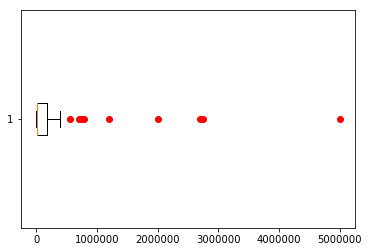

In [17]:
for grpName in uniques:
    elem = df[df.ds_acao == grpName]
    dfElem = pd.DataFrame(elem)['vl_despesa']
    plt.boxplot(dfElem, 0,'ro', 0, 2.25)

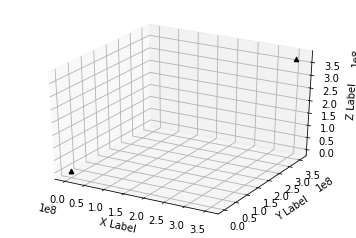

In [10]:
#for grpName in uniques:
#elem = df[df.ds_acao == grpName]
elem = data
dfElem = pd.DataFrame(elem)
axisLst = ['id_despesa_detalhe', 'vl_despesa', 'ds_subfuncao_governo']
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos

dbscan = cluster.DBSCAN()
extrData = [
            dfElem[axisLst[0]],
            dfElem[axisLst[1]],
            dfElem[axisLst[1]]
           ]

X_iris3D = extrData

dbscan.fit(X_iris3D)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos
for i in range(len(X_iris3D)):
    ax.scatter(X_iris3D[i][0],X_iris3D[i][1],X_iris3D[i][2],c=color[dbscan.labels_[i]],marker=mark[dbscan.labels_[i]])

ax.set_xlabel('X Label') # rótulos dos eixos
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


In [11]:
for grpName in uniques:
    elem = df[df.ds_acao == grpName]
    dfElem = pd.DataFrame(elem)
    